* 개선을 위한 방법
1. 마지막엔 test을 나누지말고 그냥 전부 train 시켜버린다
2. 쓸데 없는 열을 버려본다?
3. 앙상블 모델을 써볼까?

In [ ]:
import pandas as pd
import numpy as np
import joblib

# 데스크탑
df = pd.read_csv("C:\\Users\\Hong_PC\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\fog_train.csv")

# 노트북


In [2]:
# 1열 제거
df = df.drop(columns=[df.columns[0]])
# 열 이름의 . 앞에 단어 제거
df.columns = [col.split('.')[-1] if '.' in col else col for col in df.columns]

In [3]:
df.head()

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
0,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
1,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
2,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
3,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
4,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3156459 entries, 0 to 3156458
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      object 
 1   month     int64  
 2   day       int64  
 3   time      int64  
 4   minute    int64  
 5   stn_id    object 
 6   ws10_deg  float64
 7   ws10_ms   float64
 8   ta        float64
 9   re        float64
 10  hm        float64
 11  sun10     float64
 12  ts        float64
 13  vis1      int64  
 14  class     int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 361.2+ MB


In [5]:
df.describe()

,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
count,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
mean,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00
max,1.200000e+01,3.100000e+01,2.300000e+01,5.000000e+01,3.600000e+02,2.250000e+01,3.780000e+01,1.000000e+00,1.000000e+02,2.687000e+01,7.010000e+01,6.052500e+04,4.000000e+00


In [6]:
df.columns

Index(['year', 'month', 'day', 'time', 'minute', 'stn_id', 'ws10_deg',
       'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts', 'vis1', 'class'],
      dtype='object')

In [7]:
# # 시간
# df['year'].value_counts() # 년도
# df['month'].value_counts() # 월
# df['day'].value_counts() # 일
# df['time'].value_counts() # 시간(0~23)
# df['minute'].value_counts() # 분(10분 단위)
# df['stn_id'].value_counts() # 지점 번호

# -99 있음
# df['ws10_deg'].value_counts() # 10분 평균 풍향, 단위 : deg
# df['ws10_ms'].value_counts() # 10분 평균 풍속, 단위 : m/s
# df['ta'].value_counts() # 1분 평균 기온 10분 주기, 단위 : C
# df['re'].value_counts() # 강수 유무(0:무강수, 1:강수)
# df['hm'].value_counts() # 1분 평균 상대 습도 10분 주기, 단위 : %
# df['sun10'].value_counts() # 1분 일사량 10분 단위 합계, 단위 : MJ
# df['ts'].value_counts() # 1분 평균 지면온도 10분 주기, 단위 : C
# df['vis1'].value_counts() # 1분 평균 시정 10분 주기, 단위 : C(test데이터 셋엔 없음)
# df['class'].value_counts() # 시정 구간

In [8]:
# 'fog_train.vis1'이나 'fog_train.class' 열의 값이 -99.9인 행을 제거합니다.(315만개중에 2만개 손실)
# df1은 
df1 = df[(df['vis1'] != -99) & (df['class'] != -99)]
print(df.shape)
print(df1.shape)

(3156459, 15)
(3133943, 15)


In [9]:
# 데이터 비율 (0.01%, 1:99)
print(df1[(df1['class']!=4)].shape)
print(df1[(df1['class']==4)].shape)

(32134, 15)
(3101809, 15)


In [10]:
# 방법1 : -99.9를 전부 제거
# -99.9를 다 날렸을 때 (315만개중에 15만개로 손실)
df1 = df1[(df1['ws10_deg'] != -99.9) & (df1['ws10_ms'] != -99.9) & (df1['ta'] != -99.9) & (df1['re'] != -99.9) & (df1['hm'] != -99.9) & (df1['sun10'] != -99.9) & (df1['ts'] != -99.9)]
print(df1.shape)
# (2994850, 15)

# 확인용
# # -99.9를 다 날렸을 때 (13만개 손실, 그중 413개만이 class가 4가 아님, 0.0002%라 그냥 버려도 될듯)
# df10 = df1.copy()
# df12 = df10[(df10['ws10_deg'] == -99.9) | (df10['ws10_ms'] == -99.9) | (df10['ta'] == -99.9) | (df10['re'] == -99.9) | (df10['hm'] == -99.9) | (df10['sun10'] == -99.9) | (df10['ts'] == -99.9)]
# print(df12.shape)
# print(df12[(df12['class']!=4)].shape)

(2994850, 15)


In [11]:
# # 방법2 : -99.9를 NA 처리후 선형보간법
# # df1에서 변수들 -99 NA처리
# # 변환할 열 리스트
# numeric_cols = ['stn_id_5', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts']

# # -99.9 값을 NaN으로 변환
# df1[numeric_cols] = df1[numeric_cols].replace(-99.9, np.nan)

# # 변경된 데이터프레임을 출력하여 확인합니다.
# print(df1.head())

# # 선형보간법을 이용하여 NA값 처리
# df1[numeric_cols] = df1[numeric_cols].interpolate(method='linear')
# print(df1.isnull().sum())
# print("Total missing values: ", df1.isnull().sum().sum())

In [12]:
df1
df1['class'].value_counts()
df1['stn_id'].value_counts()

EC    154264
DB    154223
AE    154164
AC    154029
EA    153924
CB    153785
EB    153309
AF    153077
DC    152831
AH    151897
AG    151371
DA    151309
AD    148005
BC    147124
AA    146638
AB    146559
BB    144207
BA    143808
BD    143586
CA    136740
Name: stn_id, dtype: int64

In [13]:
# 새로운 열 'stn_id_5'를 만듭니다 (stn_id 열에서 첫 글자만 추출)
df1['stn_id_5'] = df1['stn_id'].astype(str).str[0]

In [14]:
df2 = df1.copy()
df2 = df2.drop(['stn_id'], axis=1)

from sklearn.preprocessing import LabelEncoder
# 'stn_id_5' 열을 숫자로 변환
label_encoder = LabelEncoder()
df2['stn_id_5'] = label_encoder.fit_transform(df2['stn_id_5'])

In [15]:
# 'year' 열을 숫자로 변환
df2['year'] = label_encoder.fit_transform(df2['year'])

# vis1 열 제거
df2 = df2.drop(['vis1'], axis=1)

In [16]:
print(df2.shape)
print(df2.head(-5))

(2994850, 14)
         year  month  day  time  minute  ws10_deg  ws10_ms   ta   re    hm  \
0           0      1    1     0      10       0.0      0.0 -6.4  0.0  38.9   
1           0      1    1     0      20       0.0      0.0 -6.3  0.0  37.9   
2           0      1    1     0      30       0.0      0.0 -6.3  0.0  40.0   
3           0      1    1     0      40      27.8      0.4 -6.2  0.0  39.5   
4           0      1    1     0      50      59.7      0.5 -6.1  0.0  39.8   
...       ...    ...  ...   ...     ...       ...      ...  ...  ...   ...   
3156449     2     12   31    22      20     321.9      4.9  2.3  0.0  49.2   
3156450     2     12   31    22      30     317.2      5.4  2.3  0.0  49.6   
3156451     2     12   31    22      40     313.8      5.5  2.3  0.0  50.0   
3156452     2     12   31    22      50     306.9      6.2  2.3  0.0  50.2   
3156453     2     12   31    23       0     304.1      6.6  2.4  0.0  50.3   

         sun10   ts  class  stn_id_5  
0         

### 클러스터로 살펴보기

In [25]:
# 지역 분류용 클러스터 적용(n=5)
# 월 분류용 클러스터 적용(n=3)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df2 = df1.copy()

# 'stn_id' 열을 숫자로 변환
label_encoder = LabelEncoder()
df2['stn_id_5'] = label_encoder.fit_transform(df2['stn_id_5'])

# 데이터 정규화
numeric_cols = ['month', 'stn_id_5', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts','vis1']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2[ numeric_cols])

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=1)
df2['cluster'] = kmeans.fit_predict(df_scaled)

# 클러스터링 결과를 출력합니다.
print(df2['cluster'].value_counts())

c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1    892806
2    663883
0    649920
4    629089
3    159152
Name: cluster, dtype: int64


stn_id_5         0         1         2         3         4
cluster                                                   
0          71087.0   34135.0   15302.0   20067.0   22488.0
1              0.0       0.0   46309.0  400458.0  448095.0
2         346438.0  190944.0  109366.0   21560.0       0.0
3         410660.0  210703.0   90436.0   27895.0       0.0
4         422382.0  192229.0   53389.0       0.0       0.0


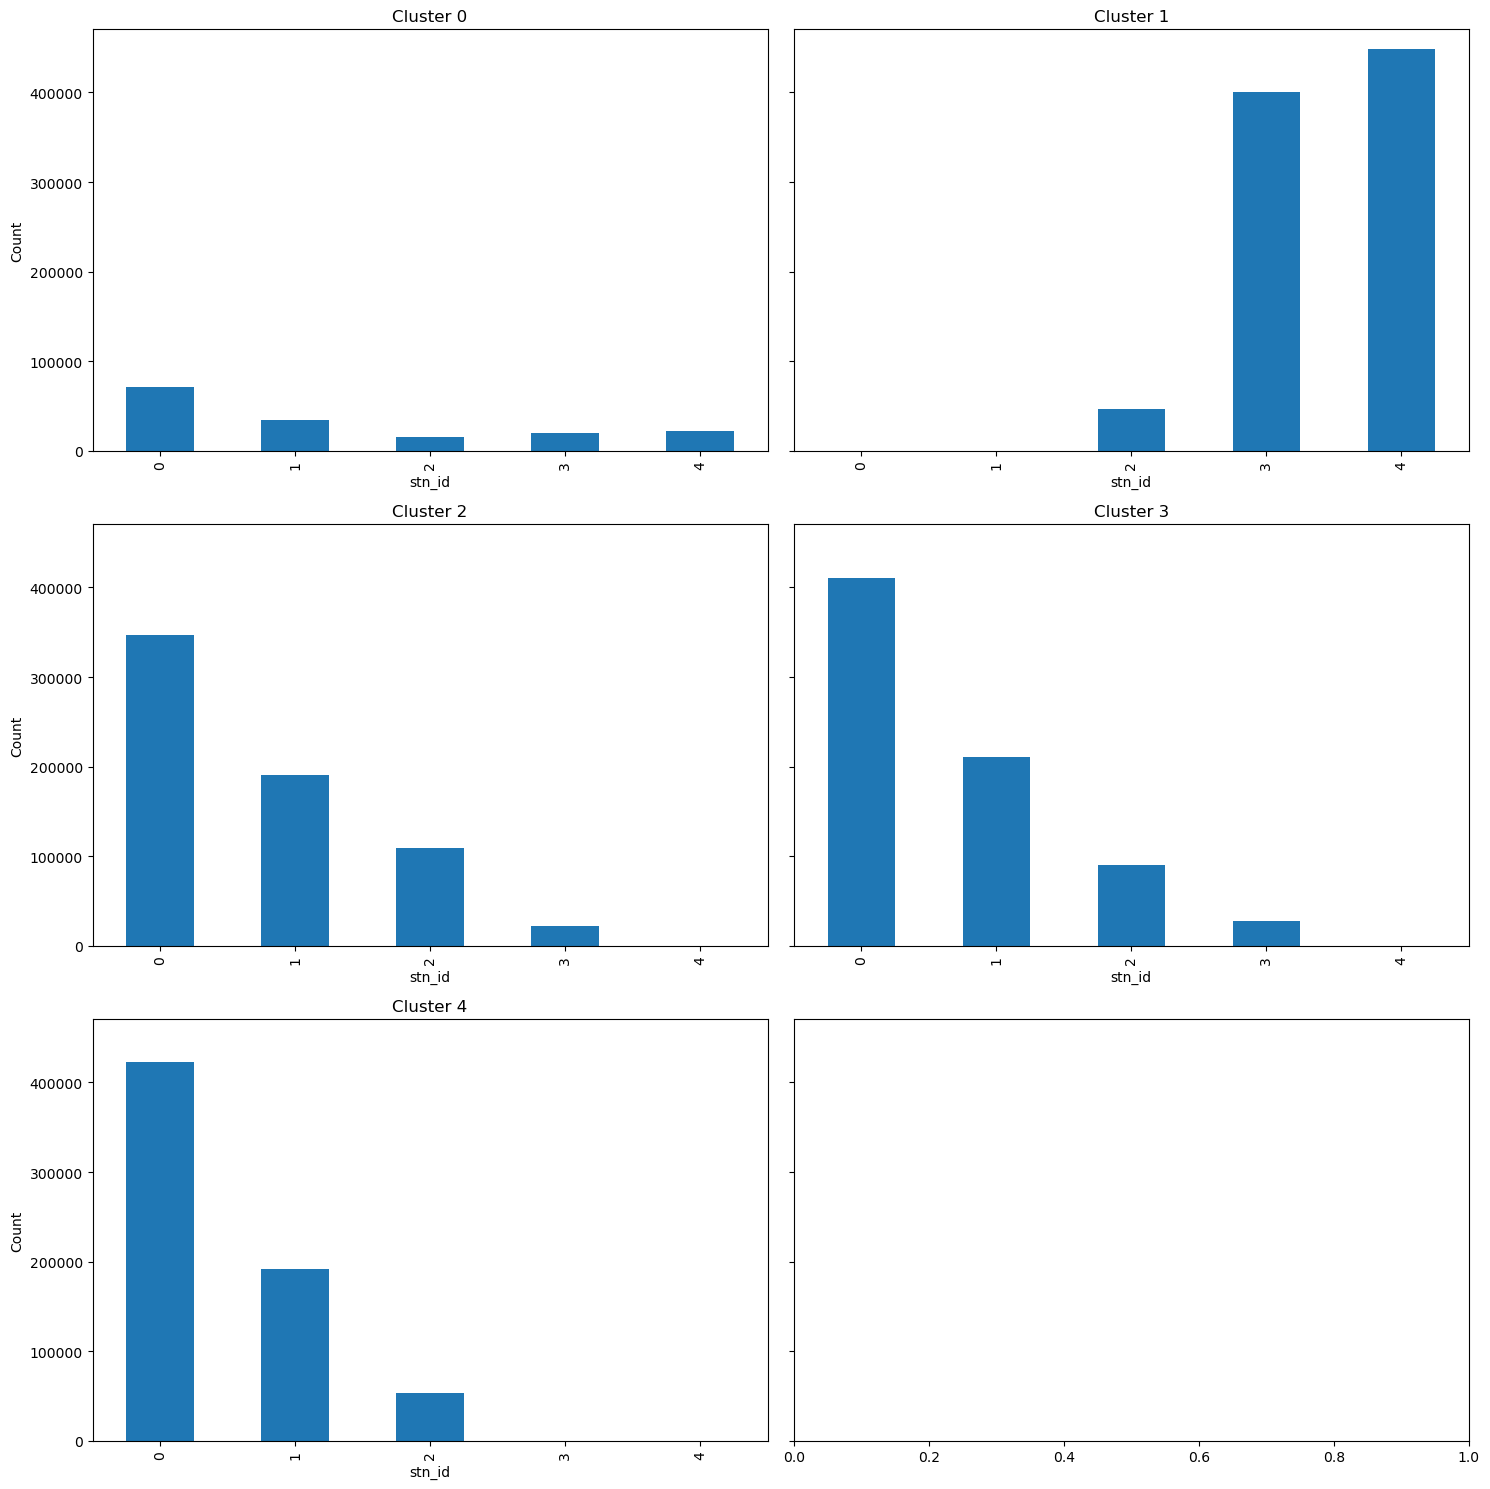

In [46]:
# 각 클러스터별로 stn_id의 개수를 계산합니다.
cluster_stn_counts = df2.groupby('cluster')['stn_id_5'].value_counts().unstack().fillna(0)

# 클러스터별 stn_id 개수 출력
print(cluster_stn_counts)

# 그래프 그리기
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharey=True)

for i, ax in enumerate(axes.flatten()[:5]):
    if i in cluster_stn_counts.index:
        cluster_stn_counts.loc[i].plot(kind='bar', ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel('stn_id')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [47]:
# 월 분류용 클러스터 적용(n=3)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df2 = df1.copy()

# 'stn_id' 열을 숫자로 변환
label_encoder = LabelEncoder()
df2['stn_id_5'] = label_encoder.fit_transform(df2['stn_id_5'])

# 데이터 정규화
numeric_cols = ['month', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts','vis1']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2[ numeric_cols])

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=1)
df2['cluster'] = kmeans.fit_predict(df_scaled)

# 클러스터링 결과를 출력합니다.
print(df2['cluster'].value_counts())

c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0    1786744
1    1183971
2     163228
Name: cluster, dtype: int64


month          1         2         3         4         5         6         7   \
cluster                                                                         
0             0.0       0.0       0.0     208.0   65877.0  236688.0  240599.0   
1        255579.0  235742.0  252424.0  248621.0  188073.0    3532.0       0.0   
2         11408.0    8459.0   14423.0    9742.0   12998.0   17170.0   23578.0   

month          8         9         10        11        12  
cluster                                                    
0        237326.0  240247.0  254999.0  248981.0  261819.0  
1             0.0       0.0       0.0       0.0       0.0  
2         26058.0   17982.0    8584.0    7908.0    4918.0  


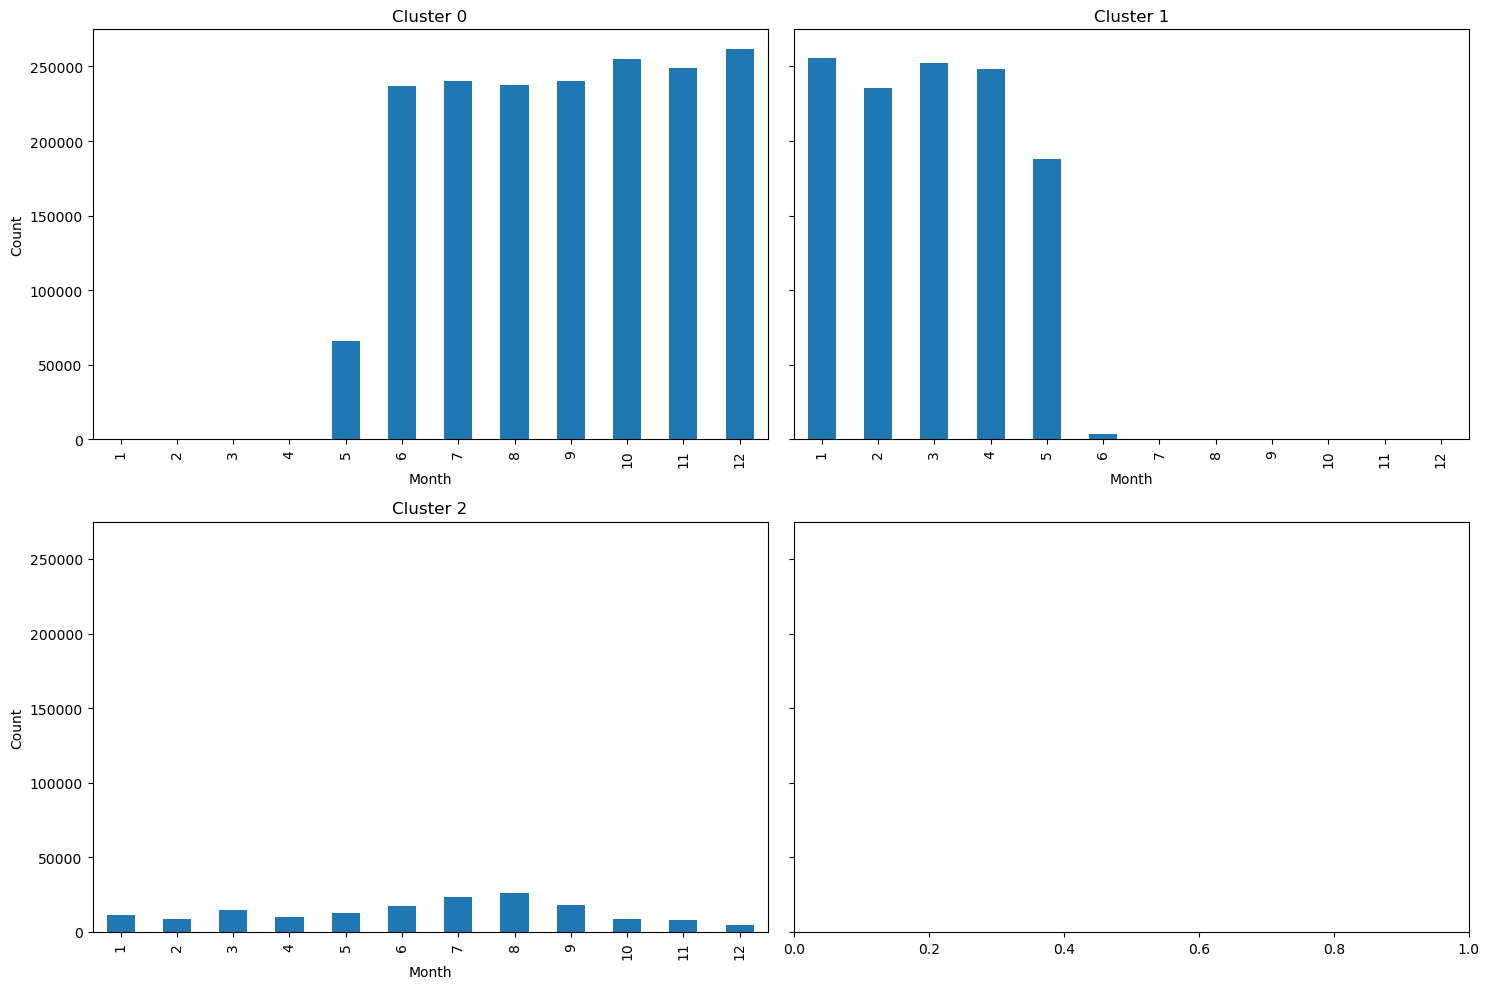

In [48]:
import matplotlib.pyplot as plt
# 각 클러스터별로 월별 데이터 개수를 계산합니다.
cluster_month_counts = df2.groupby('cluster')['month'].value_counts().unstack().fillna(0)

# 클러스터별 월별 데이터 개수 출력
print(cluster_month_counts)

# 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i in cluster_month_counts.index:
        cluster_month_counts.loc[i].plot(kind='bar', ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [49]:
# 월 분류용 클러스터 적용(n=4)
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df2 = df1.copy()

# 'stn_id' 열을 숫자로 변환
label_encoder = LabelEncoder()
df2['stn_id'] = label_encoder.fit_transform(df2['stn_id'])

# 데이터 정규화
numeric_cols = ['month', 'ws10_deg', 'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts','vis1']
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2[ numeric_cols])

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=4, random_state=1)
df2['cluster'] = kmeans.fit_predict(df_scaled)

# 클러스터링 결과를 출력합니다.
print(df2['cluster'].value_counts())

c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3    1005448
1    1000061
2     965281
0     163153
Name: cluster, dtype: int64


month          1         2         3         4        5         6         7   \
cluster                                                                        
0         11405.0    8459.0   14423.0    9737.0  12996.0   17170.0   23564.0   
1             0.0       0.0       0.0    1203.0  85821.0  122163.0  104502.0   
2             5.0    1003.0   17168.0   49045.0  86959.0  117939.0  136111.0   
3        255577.0  234739.0  235256.0  198586.0  81172.0     118.0       0.0   

month          8         9         10        11        12  
cluster                                                    
0         26057.0   17976.0    8584.0    7907.0    4875.0  
1        128719.0   92469.0  131670.0  153521.0  179993.0  
2        108608.0  147784.0  123329.0   95461.0   81869.0  
3             0.0       0.0       0.0       0.0       0.0  


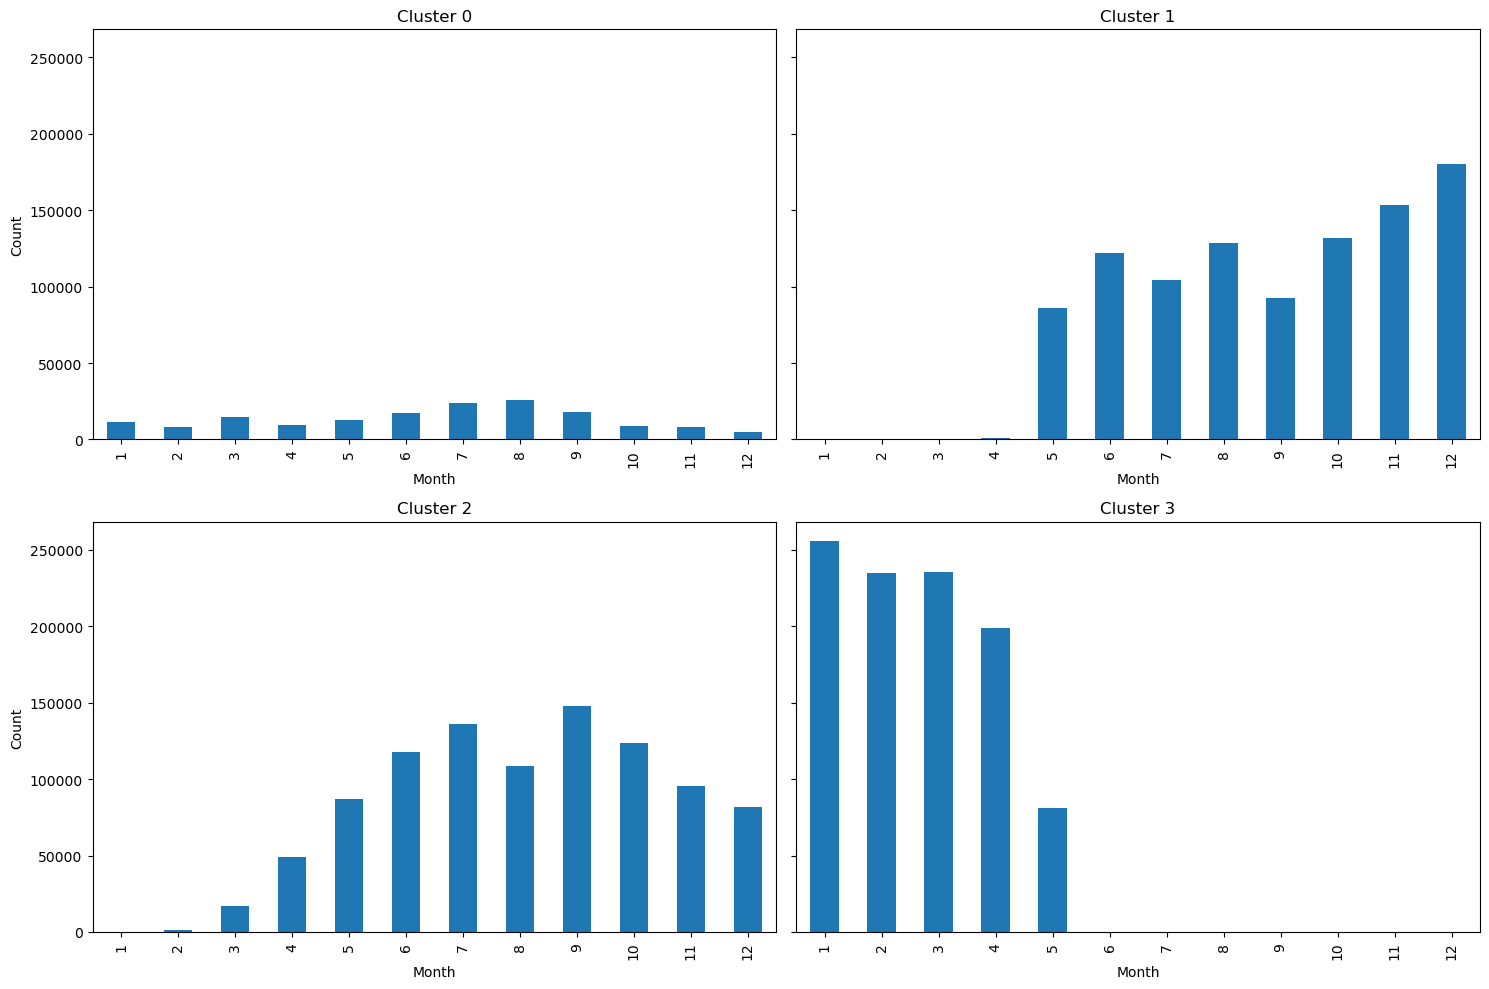

In [50]:
import matplotlib.pyplot as plt
# 각 클러스터별로 월별 데이터 개수를 계산합니다.
cluster_month_counts = df2.groupby('cluster')['month'].value_counts().unstack().fillna(0)

# 클러스터별 월별 데이터 개수 출력
print(cluster_month_counts)

# 그래프 그리기
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i in cluster_month_counts.index:
        cluster_month_counts.loc[i].plot(kind='bar', ax=ax)
        ax.set_title(f'Cluster {i}')
        ax.set_xlabel('Month')
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

### CLASS 예측(분류)

#### RNN

In [17]:
df2

,year,month,day,time,minute,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,class,stn_id_5
0,0,1,1,0,10,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,4,0
1,0,1,1,0,20,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,4,0
2,0,1,1,0,30,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,4,0
3,0,1,1,0,40,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,4,0
4,0,1,1,0,50,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156454,2,12,31,23,10,305.3,7.7,2.5,0.0,50.2,0.0,-0.9,4,4
3156455,2,12,31,23,20,293.8,5.7,2.3,0.0,50.1,0.0,-1.3,4,4
3156456,2,12,31,23,30,274.2,4.9,2.2,0.0,51.0,0.0,-1.4,4,4
3156457,2,12,31,23,40,270.3,4.6,2.1,0.0,51.7,0.0,-1.6,4,4


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score, classification_report
import matplotlib.pyplot as plt

In [19]:
# 특성과 타겟 정의
features = df2.drop(['class'], axis=1).values.astype('float32')
target = df2['class'].values

# 타겟 원-핫 인코딩
target_encoded = to_categorical(target - 1)  # assuming class labels are 1 to 4

# 데이터 정규화
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [20]:
# 시퀀스 데이터 생성
def create_sequences(data, target, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(target[i + sequence_length])
    return np.array(sequences, dtype=np.float32), np.array(labels, dtype=np.float32)

# 시퀀스 길이 정의
sequence_length = 30  # 1달을 기준으로 30개 타임스텝을 사용

In [21]:
# 시퀀스 데이터 생성
X, y = create_sequences(features_scaled, target_encoded, sequence_length)

# 학습 데이터와 테스트 데이터 분리
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [22]:
# LSTM 모델 정의
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, X.shape[2]), return_sequences=False))
model.add(Dense(4, activation='softmax'))  # 다중 분류를 위한 softmax 활성화 함수

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 얼리스타핑 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1, # 로그 출력
                               restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/50
29949/29949 [==============================] - 281s 9ms/step - loss: 0.0609 - accuracy: 0.9878 - val_loss: 0.0285 - val_accuracy: 0.9958
Epoch 2/50
29949/29949 [==============================] - 273s 9ms/step - loss: 0.0556 - accuracy: 0.9879 - val_loss: 0.0271 - val_accuracy: 0.9958
Epoch 3/50
29949/29949 [==============================] - 363s 12ms/step - loss: 0.0529 - accuracy: 0.9880 - val_loss: 0.0283 - val_accuracy: 0.9957
Epoch 4/50
29949/29949 [==============================] - 471s 16ms/step - loss: 0.0509 - accuracy: 0.9880 - val_loss: 0.0326 - val_accuracy: 0.9947
Epoch 5/50
18718/18718 [==============================] - 94s 5ms/step - loss: 0.0514 - accuracy: 0.9891
Test Loss: 0.0513518825173378, Test Accuracy: 0.9891395568847656


18718/18718 [==============================] - 86s 5ms/step
Balanced Accuracy: 0.24999957803058434


c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Hong_PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1663
           1       0.00      0.00      0.00      2689
           2       0.00      0.00      0.00      2152
           3       0.99      1.00      0.99    592460

    accuracy                           0.99    598964
   macro avg       0.25      0.25      0.25    598964
weighted avg       0.98      0.99      0.98    598964



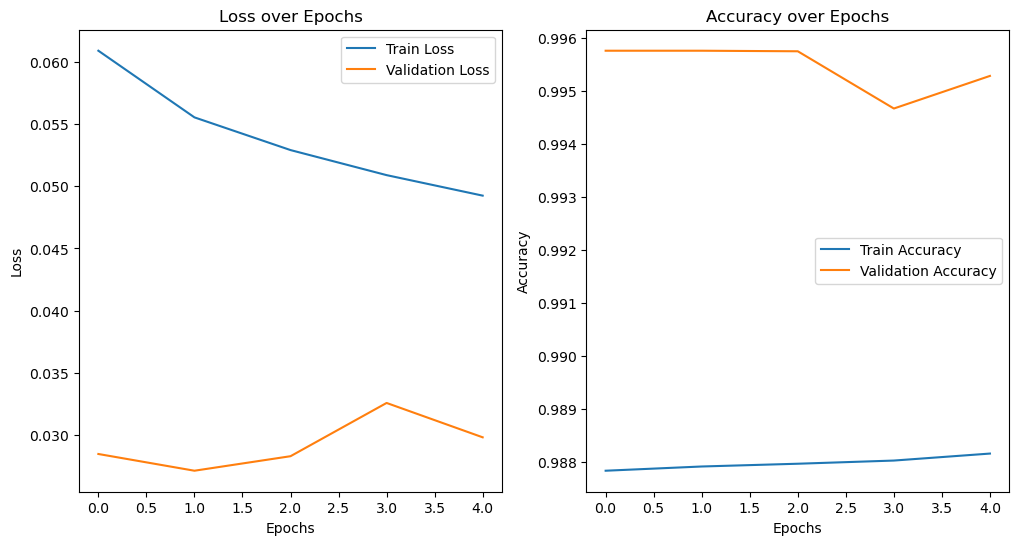

In [23]:
# 기존

# 예측
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# balanced accuracy 계산
balanced_acc = balanced_accuracy_score(y_true_classes, y_pred_classes)
print(f'Balanced Accuracy: {balanced_acc}')

# 분류 보고서 출력
print(classification_report(y_true_classes, y_pred_classes))

# 학습 결과 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# CSI 반영 1
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score

y_true = y_true_classes

# 혼동 행렬 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# ACC 및 Balanced ACC 계산
acc = accuracy_score(y_true, y_pred)
balanced_acc = balanced_accuracy_score(y_true, y_pred)

# CSI 계산
H = np.diag(conf_matrix)
F = np.sum(conf_matrix, axis=0) - H
M = np.sum(conf_matrix, axis=1) - H
CSI = H / (H + F + M)
mean_CSI = np.mean(CSI)

# 결과 출력
print(f'Accuracy: {acc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'CSI per class: {CSI}')
print(f'Mean CSI: {mean_CSI}')

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
# CSI 반영 2

import matplotlib.pyplot as plt

# 학습 및 검증 손실 그래프
plt.figure(figsize=(12, 6))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 혼동 행렬 그래프
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

#### RF

### VIS1 예측(회귀)

#### RNN

#### RF